In [1]:
!pip install pmdarima


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates= True)

In [5]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'], model ='multiplicative')

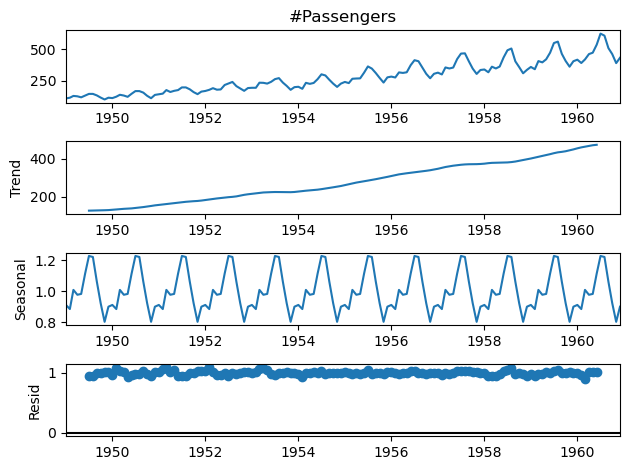

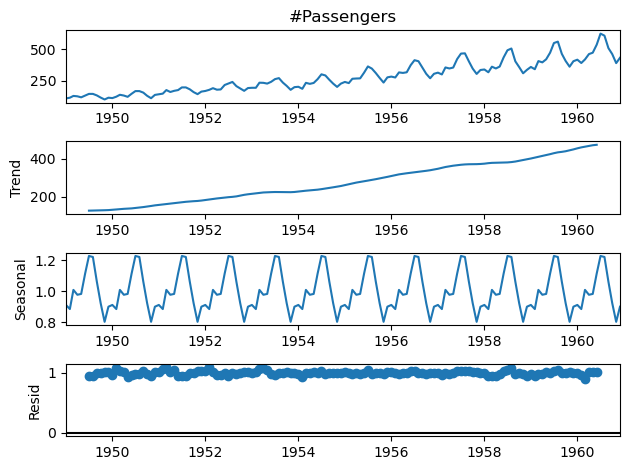

In [7]:
# ETS plot
result.plot()

In [9]:
# Fit auto_arima function to AirPassengers dataset
from pmdarima import auto_arima
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't wantconvergence warnings
stepwise = True) # set to stepwise
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=2.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.78 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.64 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.05 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.70 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.35 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.59 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 03 Jun 2023   AIC                           1019.178
Time:                                     13:26:00   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
 # Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['#Passengers'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                            Sat, 03 Jun 2023   AIC                            896.028
Time:                                    13:28:05   BIC                            909.923
Sample:                                01-01-1949   HQIC                           901.670
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2979      0.078     -3.843      0.000      -0.450      -0.146
ar.S.L12       0.7110      0.225      3.163      0.002       0.270       1.152
ar.S.L24       0.2881      0.099      2.904      0.004       0.094       0.483
ma.S.L12      -0.9797      2.073     -0.473      0.637      -5.043       3.084
sigma2        88.2259    165.043      0.535      0.593    -235.252     411.704
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

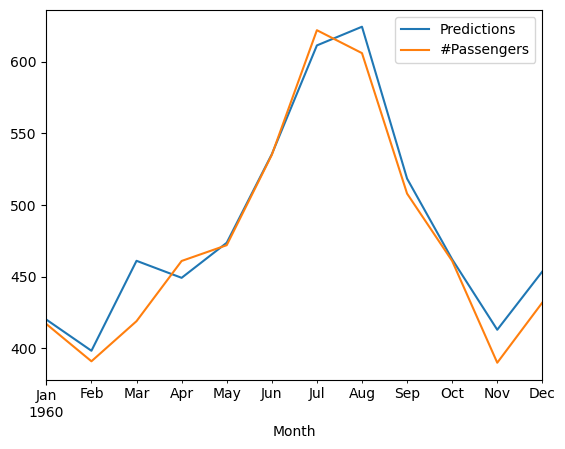

In [11]:
 start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,
typ = 'levels').rename("Predictions")
# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

In [12]:
 # Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
rmse(test["#Passengers"], predictions)

17.174348951532576

In [13]:
# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)

294.9582619090081

<AxesSubplot:xlabel='Month'>

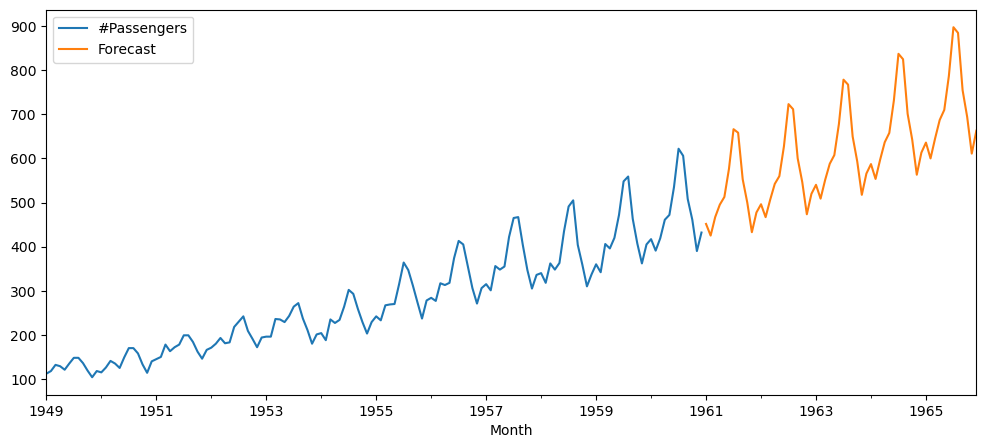

In [14]:
# Train the model on the full dataset
model = SARIMAX(airline['#Passengers'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))
result = model.fit()
# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
end = (len(airline)-1) + 5 * 12,
typ = 'levels').rename('Forecast')
# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)